# UCD ECO Python Tools - Tutorial

In [28]:
import pandas as pd
import os
import requests as req
import json
import numpy as np
import datetime

from matplotlib import style
import matplotlib
%matplotlib inline
style.use('ggplot')


# This is to import custom-made modules
# This can be removed after making these modules a real library
import os, sys
lib_path = os.path.abspath(os.path.join('..', 'building-analytics')) # relative path of the source code in Box Folder 
lib_path2 = os.path.abspath(os.path.join('..', 'building-analytics', 'importers')) # relative path of the source code in Box Folder 

sys.path.append(lib_path)
sys.path.append(lib_path2)

#  new modules - marco.pritoni@gmail.com
from PI_client import *
#from Data_Preprocessor import *
#from Dataset import *
#from Modeling import *

# note for Students: these are probably PIPy_Datalink2 and Data_Preprocessor2 for you

## 1) PIPy datalink - Python implementation

### Instantiate class script

In [14]:
p=pi_client()

### Get data using Web ID

<Response [200]>
<Response [200]>


,UnknownName
2016-01-22 00:00:00,1129.0
2016-01-22 01:00:00,1092.0
2016-01-22 02:00:00,1109.0
2016-01-22 03:00:00,1112.0
2016-01-22 04:00:00,1133.0


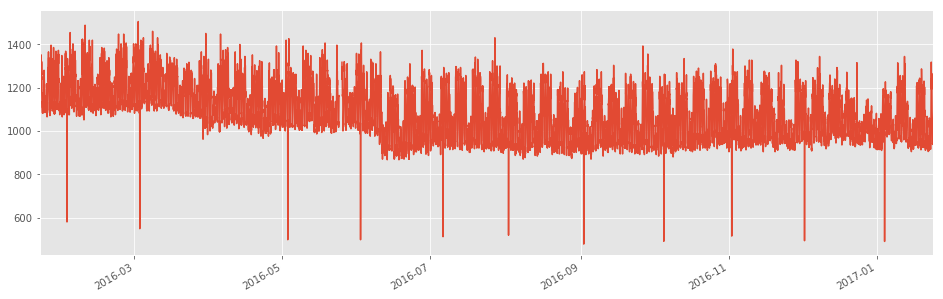

In [15]:
## method get_stream()
## get the stream by WebID
## input: Web ID
## 
## output: pandas DataFrame/dictionary
##
## arguments: 
## Web_ID=None : - the unique identifier of the time series 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 

Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2016-01-22", _end="2017-01-24", _label="UnknownName").plot(figsize=(16,5), legend=False)
p.get_stream(Web_ID,_start="2016-01-22", _end="2017-01-24",_label="UnknownName").head()

### Get data using Web ID - specify dates and summary output

In [16]:
## example using the _calculation="summary"
Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All",_label="UnknownName")

<Response [200]>


,UnknownName
Count,172800.000000
PopulationStdDev,112.734120
PercentGood,100.000000
Average,1021.991123
Maximum,1381.517456
Range,503.370850
Minimum,878.146606
StdDev,112.734120
Total,2043.982246
TotalWithUOM,2043.982246


### Get data using Point name

<Response [200]>


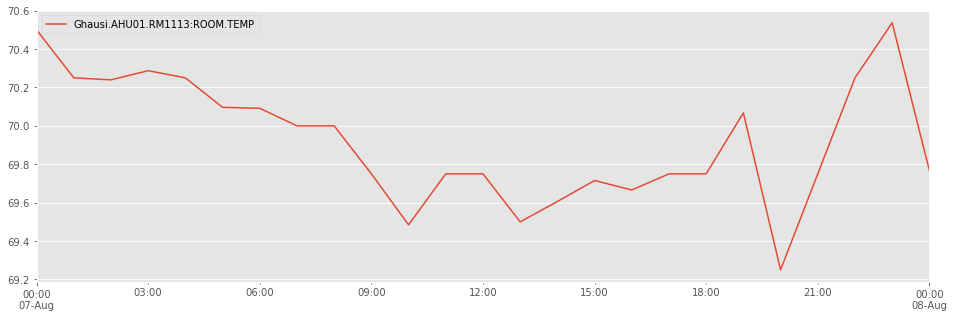

In [17]:
## get_stream_by_point()
##
## getting the data by WebIDs is not pratical
## we want to get the data by data point name 
## 
## input: point name; can use *  
##
## output: pandas DataFrame/dictionary
##
##
## arguments: 
## point_name : - the name is unique in each database 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 
# dataserver : there can be more databases in a PI environment; default "s09KoOKByvc0-uxyvoTV1UfQVVRJTC1QSS1Q"

point_name="Ghausi.AHU01.RM1113:ROOM.TEMP"

p.get_stream_by_point(point_name).plot(figsize=(16,5))

### Get data using Point name - multiple points

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
2017-08-07 00:00:00,70.500000,71.30069
2017-08-07 01:00:00,70.250000,70.72547
2017-08-07 02:00:00,70.239494,71.46393
2017-08-07 03:00:00,70.287370,70.77501
2017-08-07 04:00:00,70.250000,71.41423


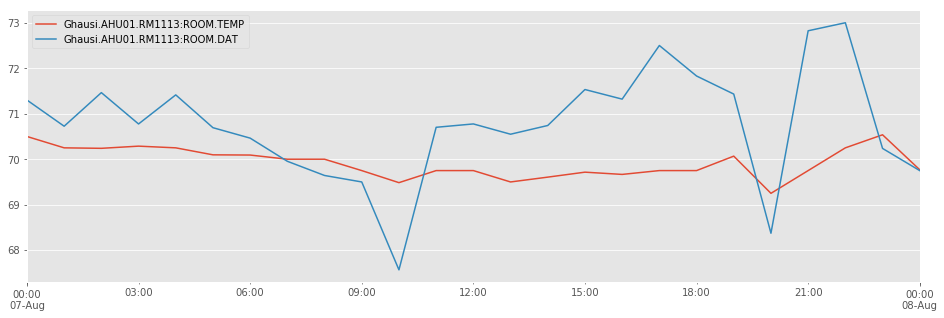

In [18]:
# test the same method with multiple point names

point_nm=["Ghausi.AHU01.RM1113:ROOM.TEMP","Ghausi.AHU01.RM1113:ROOM.DAT"]

p.get_stream_by_point(point_nm).plot(figsize=(16,5))
p.get_stream_by_point(point_nm).head()

### Get data using Point name - multiple points with summary output

In [19]:
# show that also the summary works for multiple columns
p.get_stream_by_point(point_nm,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All",_label="UnknownName")

<Response [200]>
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
Count,172800.000000,172800.000000
PopulationStdDev,0.271145,0.927055
PercentGood,99.967414,99.967414
Average,69.951389,68.914344
Maximum,70.750000,71.000000
Range,1.250000,4.500000
Minimum,69.500000,66.500000
StdDev,0.271145,0.927055
Total,139.902778,137.828688
TotalWithUOM,139.902778,137.828688


### Get data using Point name - multiple points with last point output

In [20]:
# test of calculation = _end
point_nm=["Ghausi.AHU01.RM1113:ROOM.TEMP","Ghausi.AHU01.RM1113:ROOM.DAT"]

p.get_stream_by_point(point_nm,_start="2017-01-22", _end="2017-01-24", _calculation="end",_sumType="All",_label="UnknownName")

<Response [200]>
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
Timestamp,2017-08-09T02:29:35.4860076Z,2017-08-09T02:33:37.0559997Z
Good,True,True
Value,69.75,73.5


### Search data points by name

In [21]:
## search_by_point()
## method to search for data points names using * 
##
## output: list of point names and dictionary of point name: WebIDs

l, d = p.search_by_point("OAT")
print l
print d

[u'OAT']
{u'OAT': u'P09KoOKByvc0-uxyvoTV1UfQzo8BAAVVRJTC1QSS1QXE9BVA'}


### Search data points by path

In [22]:
l, d = p.search_by_path("\\UTIL-AF\CEFS\UCDAVIS\Weather|OAT")
d

<Response [200]>


{u'OAT': u'A0EbgZy4oKQ9kiBiZJTW7eugwvuNJoeTC5hGUXQAVXTB8PA0hb_A-jKzkKp44rKK973OwVVRJTC1BRlxDRUZTXFVDREFWSVNcV0VBVEhFUnxPQVQ'}

### Get data using by path

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


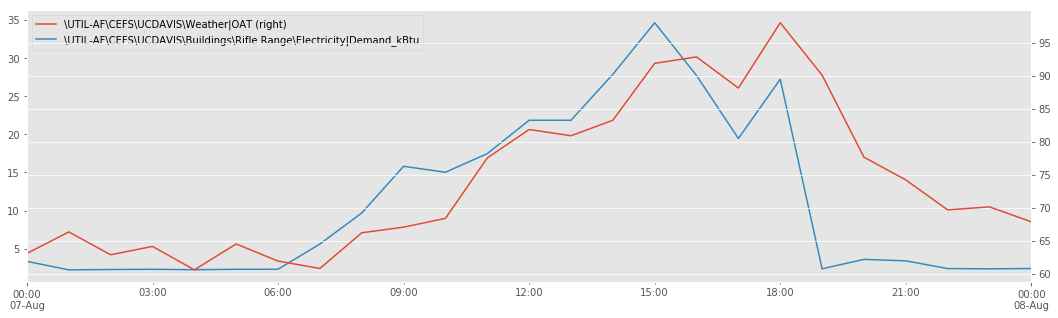

In [23]:
path_name="\\UTIL-AF\CEFS\UCDAVIS\Buildings\Rifle Range\Electricity|Demand_kBtu"

path_name=["\\UTIL-AF\CEFS\UCDAVIS\Weather|OAT","\\UTIL-AF\CEFS\UCDAVIS\Buildings\Rifle Range\Electricity|Demand_kBtu"]

p.get_stream_by_path(path_name,_label="UnknownName").plot(figsize=(18,5),secondary_y="\\UTIL-AF\CEFS\UCDAVIS\Weather|OAT")

## 2) Data Pre-Processor (clean and featurize)

### Search for Data Points

In [24]:
# find meters at Ghausi Hall
p.search_by_point("Ghausi*BTU")

([u'Ghausi_ChilledWater_Demand_kBtu',
  u'Ghausi_Electricity_Demand_kBtu',
  u'Ghausi_Steam_Demand_kBtu'],
 {u'Ghausi_ChilledWater_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQ1yMAAAVVRJTC1QSS1QXEdIQVVTSV9DSElMTEVEV0FURVJfREVNQU5EX0tCVFU',
  u'Ghausi_Electricity_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ',
  u'Ghausi_Steam_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQ2CMAAAVVRJTC1QSS1QXEdIQVVTSV9TVEVBTV9ERU1BTkRfS0JUVQ'})

### Get Data

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


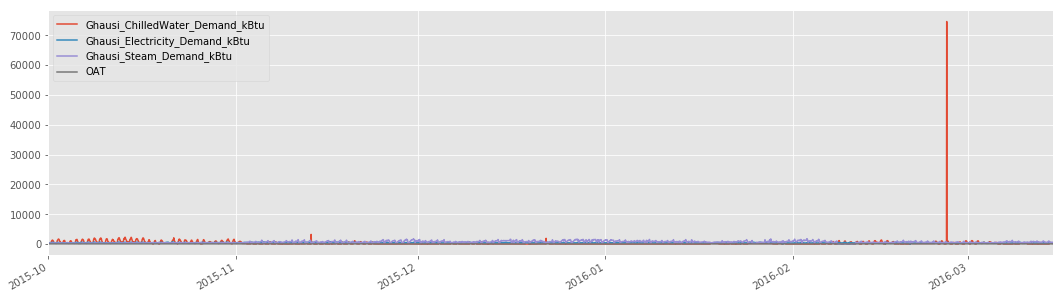

In [25]:
# run the data through data cleaning (can also choose options)
point_names= ['Ghausi_ChilledWater_Demand_kBtu','Ghausi_Electricity_Demand_kBtu','Ghausi_Steam_Demand_kBtu',"OAT"]
dr=p.get_stream_by_point(point_names,_start="2015-10-01", _end="2016-03-15")
dr.plot(figsize=(18,5))

### Flag the data to be removed

In [27]:
dp=data_preprocessor(dr)    
dp.flag_data( runRemoveNA=True,
              
                    removeNAhow="any",
                   
                    runRemoveOutliers=True,

                    sd_val=3,
                   
                    runRemoveOutOfBound=True,
                   
                    low_bound=-10,
                   
                    high_bound=9998 )

tSlicer=(slice(None))

print dp.data_raw.shape
print dp.data_cleaned.shape
print dp.data_removed.shape

dp.data_removed.loc[tSlicer,:].plot(figsize=(18,5))

NameError: name 'data_preprocessor' is not defined

### Clean Data

In [ ]:
dp.clean_data(      runResample=True,

                    freq="1h",                   

                    runInterpolate=True,

                    limit=1,
                   
                    runRemoveNA=True,
              
                    removeNAhow="any",
                   
                    runRemoveOutliers=True,

                    sd_val=3,
                   
                    runRemoveOutOfBound=False,
                   
                    low_bound=0,
                   
                    high_bound=9998
             )                
                   
tSlicer=(slice(None))
#tSlicer=(slice("2016-01","2016-02-25"))

print dp.data_raw.shape
print dp.data_cleaned.shape
print dp.data_removed.shape

dp.data_cleaned.loc[tSlicer,:].plot(figsize=(18,5))

#dp.data_raw.loc["2015-10-01 08:00:00":"2015-10-01 10:00:00","Ghausi_ChilledWater_Demand_kBtu"]=np.nan

print "raw data stats"
print dp.countNA(dp.data_raw)
print "cleaned data stats"
print dp.countNA(dp.data_cleaned)

### Pre-process data - add features (variables) for modeling

In [ ]:
dp.add_degreeDays(dp.data_cleaned)
dp.add_timeFeatures(dp.data_preprocessed)
dp.data_preprocessed.plot(figsize=(15,5))

# 3) Modeling (Manual)

### Get Data

In [ ]:
# inputs
streams = ['Ghausi_ChilledWater_Demand_kBtu','OAT']
start="2014"
end="t"

# call script
data= p.get_stream_by_point(streams,_start=start,_end=end)

# show output
data.plot(figsize=(18,5))

### Clean Data

In [ ]:
# input options 
_runResample=True
_freq="1h"             
_runInterpolate=True
_limit=1
_runRemoveNA=True      
_removeNAhow="all"  
_runRemoveOutliers=True
_sd_val=3
_runRemoveOutOfBound=True         
_low_bound=-10
_high_bound=9998

# call script 
dp=data_preprocessor(data)    
dp.clean_data(removeNAhow=_removeNAhow,low_bound=_low_bound)                
    
# print/show resuts
dp.data_cleaned.plot(figsize=(18,5))

### Preprocess Data 

In [ ]:
# Add HDD/CDD and time variables in dummy format

dp.add_degreeDays(dp.data_cleaned)
dp.add_timeFeatures(dp.data_preprocessed)
dp.create_dummies(dp.data_preprocessed, var_to_expand=["TOD","DOW","MONTH"])

# resample to daily data (necessary only for steam)
#data = dp.data_preprocessed.resample("d").mean()
data = dp.data_preprocessed

### Instantiate Dataset

In [ ]:
# inputs 

## Baseline period 1 
tPeriod1=(slice("2015-01","2015-12"))

## Evaluation period 2 
tPeriod2=(slice("2016-01","2016-12"))

## Evaluation period 3 
tPeriod3=(slice("2016-01","2016-12"))

##Model Algorithm
mod = linear_model.LinearRegression()
#mod = ensemble.RandomForestRegressor()

##Model variables
out= ["Ghausi_ChilledWater_Demand_kBtu"]
inp= ['hdh', 'cdh', u'DOW_0', u'DOW_1', u'DOW_2', u'DOW_3', u'DOW_4',
       u'DOW_5', u'DOW_6', u'MONTH_1', u'MONTH_2', u'MONTH_3', u'MONTH_4',
       u'MONTH_5', u'MONTH_6', u'MONTH_7', u'MONTH_8', u'MONTH_9', u'MONTH_10',
       u'MONTH_11', u'MONTH_12']

# call class/script
dt=DataSet(data, tPeriod1, tPeriod2, tPeriod3, out, inp )

### Create Baseline Model

In [ ]:
# FIT a model over the baseline 
mod_coeff=mod.fit(dt.bs1_in.dropna(),dt.bs1_out.dropna()) # output, input in np arrays

### Calculate Goodness of Fit Metrics

In [ ]:
# format data
p = len(inp)
compare = dt.bs1_out.dropna()
mod_coeff=mod.fit(dt.bs1_in.dropna(),dt.bs1_out.dropna())
compare["Model"]= mod_coeff.predict(dt.bs1_in.dropna())

# call script
calc_scores(compare,p, out)

### Visualize Model Fit

In [ ]:
# show plots of model and goodness of fit
df_plt=dt.bs1_out.dropna()
df_plt["Pred"]=mod_coeff.predict(dt.bs1_in.dropna().values)

#plot
df_plt.plot(figsize=(15,5))
df_plt.plot(kind="scatter",x=out,y="Pred",figsize=(15,5))

### Project to Year 1 post-retrofit

In [ ]:
# project on bas 2 (2015)
df_plt=dt.bs2_out.dropna()
df_plt["Pred"]=mod_coeff.predict(dt.bs2_in.dropna().values)
sav_plt= df_plt.diff(axis=1)["Pred"]#*(-1)

#plot projection vs real post data
df_plt.plot(figsize=(15,5))
print "cumulative savings = %f percent" %((sav_plt.sum()/(df_plt[["Pred"]].sum()[0])*100))

In [ ]:
sav_plt.cumsum().plot(figsize=(15,5),color='g')
endY1=sav_plt.cumsum().max()